In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 7s 2us/step


In [4]:
import matplotlib.pyplot as plt

In [6]:
x_train[0].shape

(28, 28)

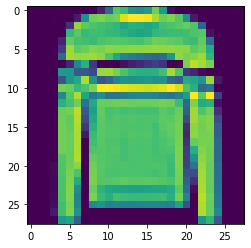

In [8]:
plt.imshow(x_train[5])

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train[0],y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [12]:
x_train.max()

255

In [13]:
x_train=x_train/255

In [14]:
x_test.max()

255

In [15]:
x_test=x_test/255

In [16]:
x_train=x_train.reshape(60000,28,28,1)

In [20]:
x_test.shape

(10000, 28, 28, 1)

In [17]:
x_test=x_test.reshape(10000,28,28,1)

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [23]:
y_cat_train=to_categorical(y_train)

In [24]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
y_cat_test=to_categorical(y_test)

In [26]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [29]:
model= Sequential()

#convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28,28,1), activation='relu',))
#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))


#flatten images 
model.add(Flatten())

#adding dense layer
model.add(Dense(128, activation='relu'))

#last layer
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [36]:
model.fit(x_train,y_cat_train, epochs=10,validation_data=(x_test,y_cat_test))

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1100 - accuracy: 0.9613 - val_loss: 0.3361 - val_accuracy: 0.9077
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1020 - accuracy: 0.9638 - val_loss: 0.3276 - val_accuracy: 0.9138
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0931 - accuracy: 0.9663 - val_loss: 0.3644 - val_accuracy: 0.9138
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0846 - accuracy: 0.9702 - val_loss: 0.3603 - val_accuracy: 0.9085
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0778 - accuracy: 0.9727 - val_loss: 0.4131 - val_accuracy: 0.9051
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0708 - accuracy: 0.9750 - val_loss: 0.4368 - val_accuracy: 0.9049
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0667 - accuracy: 0.9769 - val_loss: 0.4076 -

In [32]:
model.metrics_names

['loss', 'accuracy']

In [37]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5151 - accuracy: 0.9069


[0.5150979161262512, 0.9068999886512756]

In [39]:
import pandas as pd
losses=pd.DataFrame(model.history.history)

In [40]:
losses[['accuracy','val_accuracy']].plot()

KeyError: "None of [Index(['accuracy', 'val_accuracy'], dtype='object')] are in the [columns]"

In [41]:
x_train.columns = x_train.columns.str.replace(' ', '')

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [42]:
from sklearn.metrics import classification_report

In [49]:
import numpy as np
predictions = model.predict(x_test)
classes_x=np.argmax(predictions,axis=1)

313/313 [==============================] - 1s 3ms/step


In [45]:
y_cat_test.shape

(10000, 10)

In [46]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [51]:
classes_x[0]

9

In [52]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [55]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.86      0.87      0.86      1000
           3       0.93      0.90      0.91      1000
           4       0.85      0.86      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.73      0.75      0.74      1000
           7       0.93      0.99      0.96      1000
           8       0.98      0.97      0.97      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

